In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [22]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('Lianjia-2021-10-21')  # 连接到Lianjia数据库

zufang = db.get_collection('zufang') # 连接到集合zufang
mon_data = zufang.find()  # 查询这个集合下的所有记录

In [23]:
data = pd.json_normalize([comment for comment in mon_data])

In [24]:
data.head()

,_id,m_url,bizcircle_name,carport,checkin,city,distance,district_name,electricity,elevator,...,layout,longitude,maintain,rent_area,rent_price_listing,resblock_name,see_house,tenancy_period,type,water
0,6170b7b33348a066f769e186,https://m.lianjia.com/chuzu/sz/zufang/SZ285649...,罗湖口岸,租用车位,随时入住,深圳,311,罗湖区,民电,有,...,2室1厅1卫,114.126469,4天前,47.55,4200,新银座华庭,需提前预约,1年以内,整租,民水
1,6170b7b33348a066f769e188,https://m.lianjia.com/chuzu/sz/zufang/SZ280348...,春风路,租用车位,随时入住,深圳,,罗湖区,商电,有,...,1室1厅1卫,114.135179931,1天前,51.70,5200,万科深南广场,随时可看,6~12个月,整租,商水
2,6170b7b33348a066f769e18a,https://m.lianjia.com/chuzu/sz/zufang/SZ285639...,莲塘,暂无数据,随时入住,深圳,538,罗湖区,民电,有,...,1室0厅1卫,114.18099986379,1天前,24.00,2600,梧桐山新居二期,需提前预约,1年以内,整租,民水
3,6170b7b33348a066f769e18c,https://m.lianjia.com/chuzu/sz/zufang/SZ264414...,地王,租用车位,随时入住,深圳,,罗湖区,民电,有,...,1室1厅1卫,114.11248434789,1天前,48.37,5300,鸿翔花园,随时可看,6~12个月,整租,民水
4,6170b7b33348a066f769e18e,https://m.lianjia.com/chuzu/sz/zufang/SZ285511...,地王,租用车位,随时入住,深圳,,罗湖区,民电,有,...,1室0厅1卫,114.112788,今天,40.94,4000,鸿翔花园,需提前预约,1年以内,整租,民水


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13704 entries, 0 to 13703
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 13704 non-null  object
 1   m_url               13704 non-null  object
 2   bizcircle_name      13704 non-null  object
 3   carport             13704 non-null  object
 4   checkin             13704 non-null  object
 5   city                13704 non-null  object
 6   distance            13704 non-null  object
 7   district_name       13704 non-null  object
 8   electricity         13704 non-null  object
 9   elevator            13704 non-null  object
 10  floor               13704 non-null  object
 11  frame_orientation   13704 non-null  object
 12  gas                 13704 non-null  object
 13  house_title         13704 non-null  object
 14  latitude            13704 non-null  object
 15  layout              13704 non-null  object
 16  longitude           13

In [26]:
# 数据清洗(按列清理)
# 1. 去掉“_id”列
data = data.drop(columns='_id')

In [27]:
# 4. distance
data['frame_orientation'].unique()  # 这个数据太乱了，要用的时候再处理吧

array(['南', '东', '北', '东南', '西南', '西', '南 北', '东北', '西北', '东 西', '西南 西',
       '东 南', '东 东南 南 西南 西 西北 北 东北', '东南 南', '东南 南 西南', '东 东北', '东 南 西 北',
       '南 东北', '东南 西南 西', '西北 北', '东 北', '东 东南', '西北 东北', '南 西 西北 北 东北',
       '南 西南', '南 北 东北', '东南 西南', '东南 西南 西北', '南 西南 北', '东 西南 北', '东南 北',
       '东 南 西北', '南 西', '西 西北', '南 西 北', '', '北 东北', '西南 西北', '东 西南',
       '南 西北', '东南 东北', '东南 南 西北', '东 东南 南 西南', '南 西北 北', '东 东南 南',
       '西 西北 北', '西 北', '东 南 西', '西南 北', '东南 南 西南 东北', '东南 西', '东南 西北',
       '东 东南 北', '东 东南 西南', '东 南 北', '西南 东北', '西北 北 东北', '东南 西北 北',
       '东 东南 西', '东南 南 西 北', '东 东南 西南 西北', '东 西南 北 东北', '东南 西 东北',
       '东 西北 东北', '东 西北 北', '东南 南 北', '南 西南 西', '东南 西南 西北 北', '东南 南 西',
       '西南 西 西北 北', '东南 南 西南 西 西北', '东 东南 南 东北', '东 西南 西北',
       '东 东南 南 西南 西北', '东 东南 南 西南 西', '东 西南 西', '东南 西南 东北', '东南 南 西 东北',
       '东南 北 东北', '东 西南 东北', ' 东 东南 南', '东 东南 西南 东北', '东南 南 西南 西 北',
       '南 西南 西 北', '南 西南 东北', '东 南 西南', '东南 南 西南 北', '东 东南 南 北',
       '东 东南 南 西南 西 北

In [28]:
# 6. rent_area
data.sample(5)['rent_area']

727       58.00
5536     117.58
12866     88.00
7297      69.00
11655     70.00
Name: rent_area, dtype: object

In [29]:
# rent_area字段有些填写的是一个范围，比如23-25平房米，后期转换成“float”类型的时候不好转换，考虑取平均值
def get_aver(data):
    if isinstance(data, str) and '-' in data:
        low, high = data.split('-')
        return (int(float(low))+int(float(high)))/2
    else:
        return int(float(data))


data['rent_area'] = data['rent_area'].apply(get_aver)

In [30]:
data[data['rent_area'] < 5]

,m_url,bizcircle_name,carport,checkin,city,distance,district_name,electricity,elevator,floor,...,layout,longitude,maintain,rent_area,rent_price_listing,resblock_name,see_house,tenancy_period,type,water


In [31]:
# 房间只有1平米，是异常数据，删去
data = data.drop(data[data['rent_area'] < 5].index)

In [32]:
# 8. rent_price_listing
data[data['rent_price_listing'].str.contains('-')].sample(3)

,m_url,bizcircle_name,carport,checkin,city,distance,district_name,electricity,elevator,floor,...,layout,longitude,maintain,rent_area,rent_price_listing,resblock_name,see_house,tenancy_period,type,water
9756,https://m.lianjia.com/chuzu/sz/apartment/layou...,,,,深圳,,,,,,...,1室1厅1卫,113.91019113104183,,27.5,2380-2680,,,,整租,
9873,https://m.lianjia.com/chuzu/sz/apartment/layou...,,,,深圳,,,,,,...,1室0厅1卫,114.04711807641212,,30.0,1748-1828,,,,整租,
9642,https://m.lianjia.com/chuzu/sz/apartment/layou...,,,,深圳,,,,,,...,1室0厅1卫,113.8122049574289,,25.0,650-800,,,,整租,


In [107]:
# 8. rent_price_listing
data[(data['rent_price_listing']>1000)&(data['rent_price_listing']<1500) & (data['bizcircle_name'] !="")]

,m_url,bizcircle_name,carport,checkin,city,distance,district_name,electricity,elevator,floor,...,rent_area,rent_price_listing,resblock_name,see_house,tenancy_period,type,water,aver_price,bin,is_dep
8308,https://m.lianjia.com/chuzu/sz/zufang/SZ260199...,大运新城,租用车位,随时入住,深圳,1129.0,龙岗区,暂无数据,无,中楼层/9层,...,35.0,1390,商住楼,需提前预约,1年以内,整租,暂无数据,39.7,"(1100.0, 1200.0]",False
8860,https://m.lianjia.com/chuzu/sz/zufang/SZ286297...,龙岗中心城,暂无数据,随时入住,深圳,490.0,龙岗区,暂无数据,有,高楼层/6层,...,20.0,1350,宝龙小区,需提前预约,1年以内,整租,暂无数据,67.5,"(400.0, 500.0]",False
13267,https://m.lianjia.com/chuzu/sz/zufang/SZ287750...,坪山,租用车位,随时入住,深圳,NaN,坪山区,民电,有,中楼层/8层,...,36.0,1400,八克拉,需提前预约,1年以内,整租,民水,38.9,NaN,False
13482,https://m.lianjia.com/chuzu/sz/zufang/SZ288924...,坪山,租用车位,随时入住,深圳,NaN,坪山区,民电,有,低楼层/9层,...,39.0,1400,盈富家园,需提前预约,1年以内,整租,民水,35.9,NaN,False
13534,https://m.lianjia.com/chuzu/sz/zufang/SZ289334...,坪山,租用车位,2021-10-31,深圳,NaN,坪山区,民电,有,低楼层/9层,...,38.0,1300,盈富家园,需提前预约,1年以内,整租,民水,34.2,NaN,False


In [33]:
# 价格是有区间的，需要按照处理rent_area一样的方法处理
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)

In [34]:
# 数据类型转换
for col in ['rent_price_listing']:
    data[col] = data[col].astype(int)

In [35]:
# 'distance', 'latitude', 'longitude'因为有None，需另外处理
def dw_None_dis(data):
    if data is None or data == "":
        return np.nan
    else:
        return int(data)
    

def dw_None_latlon(data):
    if data is None or data == '':
        return np.nan
    else:
        return float(data)            


data['distance'] = data['distance'].apply(dw_None_dis)
data['latitude'] = data['latitude'].apply(dw_None_latlon)
data['longitude'] = data['longitude'].apply(dw_None_latlon)

In [36]:
# 查看数据概况
data.sample(5)

,m_url,bizcircle_name,carport,checkin,city,distance,district_name,electricity,elevator,floor,...,layout,longitude,maintain,rent_area,rent_price_listing,resblock_name,see_house,tenancy_period,type,water
5910,https://m.lianjia.com/chuzu/sz/zufang/SZ281719...,科技园,暂无数据,随时入住,深圳,NaN,南山区,民电,有,高楼层/36层,...,4室2厅3卫,113.961188,1天前,188.0,43000,华润城润府二期,需提前预约,1年以内,整租,民水
3197,https://m.lianjia.com/chuzu/sz/apartment/layou...,,,,深圳,NaN,,,,,...,1室0厅1卫,113.949752,,34.0,3798,,,,整租,
4702,https://m.lianjia.com/chuzu/sz/zufang/SZ288491...,蛇口,租用车位,随时入住,深圳,NaN,南山区,民电,有,高楼层/8层,...,1室2厅1卫,113.922853,8天前,54.0,7800,鸣溪谷,一般下班后可看,2年以内,整租,民水
118,https://m.lianjia.com/chuzu/sz/zufang/SZ288171...,黄贝岭,免费使用,随时入住,深圳,NaN,罗湖区,民电,无,3/7层,...,3室2厅1卫,114.138748,27天前,76.0,5800,翠华花园,随时可看,1年,整租,民水
10648,https://m.lianjia.com/chuzu/sz/zufang/SZ257910...,公明,暂无数据,随时入住,深圳,3.0,光明区,民电,有,高楼层/6层,...,4室2厅2卫,113.912478,8天前,90.0,5000,宏发雍景城,需提前预约,1年以内,整租,民水


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13704 entries, 0 to 13703
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   m_url               13704 non-null  object 
 1   bizcircle_name      13704 non-null  object 
 2   carport             13704 non-null  object 
 3   checkin             13704 non-null  object 
 4   city                13704 non-null  object 
 5   distance            7042 non-null   float64
 6   district_name       13704 non-null  object 
 7   electricity         13704 non-null  object 
 8   elevator            13704 non-null  object 
 9   floor               13704 non-null  object 
 10  frame_orientation   13704 non-null  object 
 11  gas                 13704 non-null  object 
 12  house_title         13704 non-null  object 
 13  latitude            13704 non-null  float64
 14  layout              13704 non-null  object 
 15  longitude           13704 non-null  float64
 16  main

In [38]:
data.to_csv('data_clean.csv', index=False)

问题：
1. 各城市的租房分布怎么样？
2. 城市各区域的房价分布怎么样？
2. 距离地铁口远近有什么关系？
3. 房屋大小对价格的影响如何？
4. 租个人房源好还是公寓好？
5. 精装和简装对房子价格的影响
6. 北方集中供暖对价格的影响
7. 北上广深租房时都看重什么？

### 1. 各城市的租房分布怎么样？

In [39]:
def get_city_zf_loc(city, city_short, col=['longitude', 'latitude', 'district_name'], data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city']==city, col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [40]:
get_city_zf_loc('深圳', 'sz', ['longitude','latitude', 'district_name'])

深圳的数据一共有13704条


<AxesSubplot:>

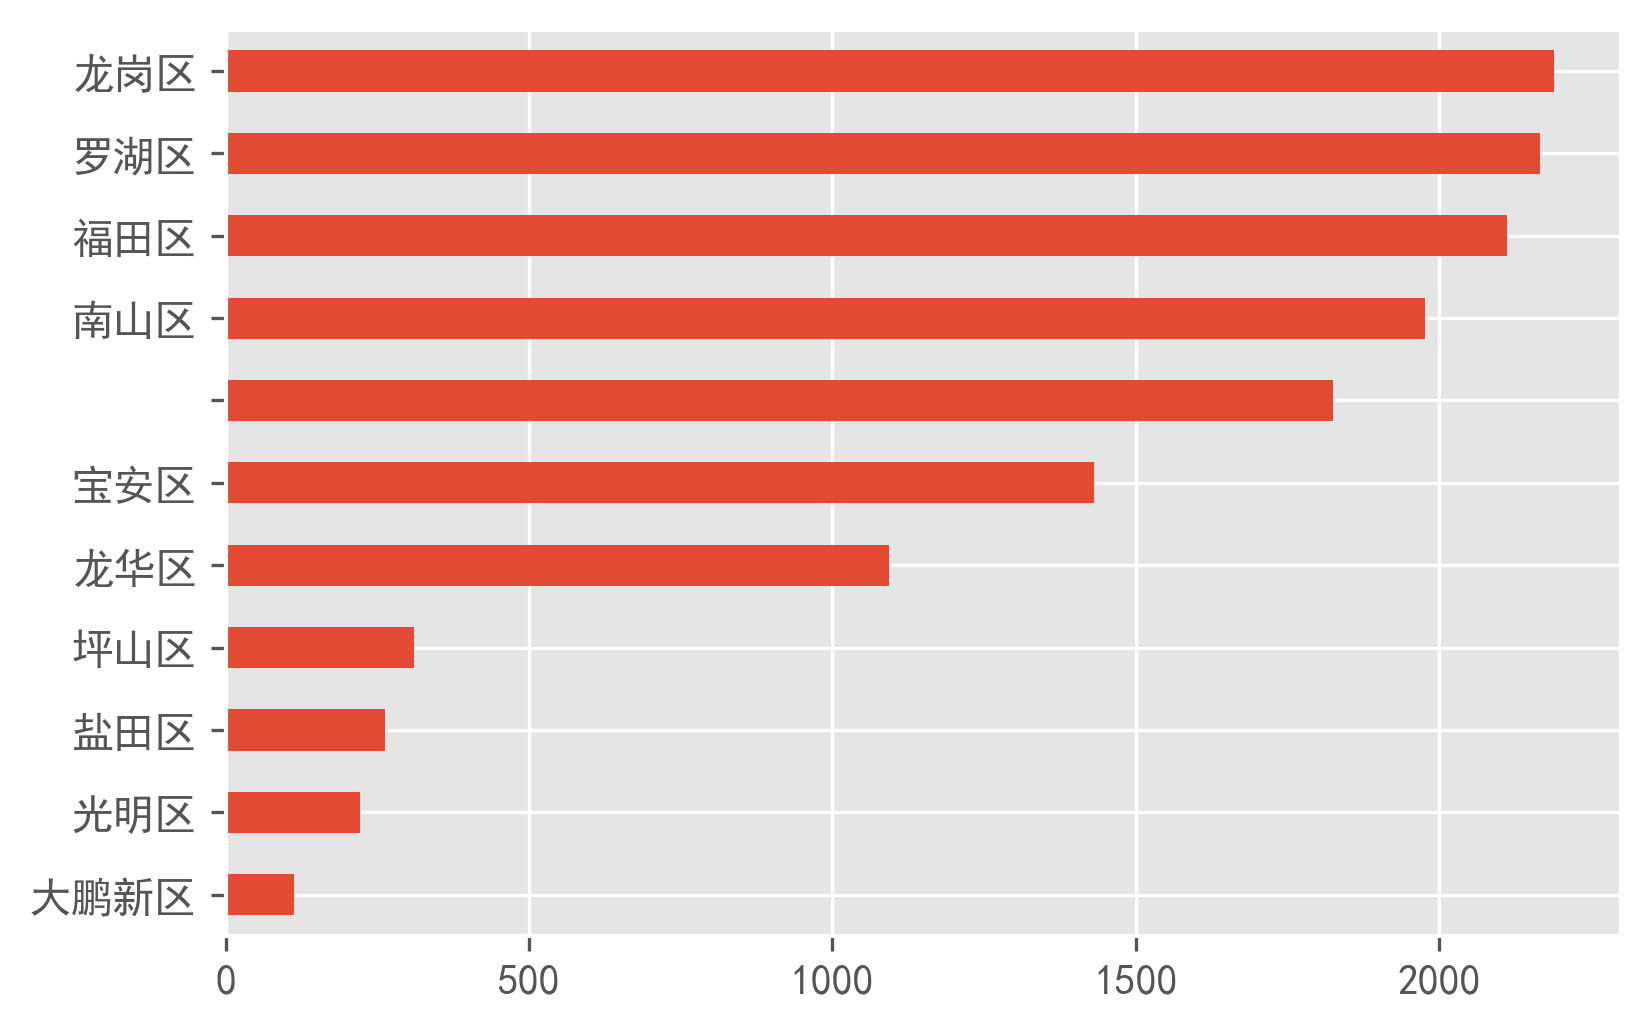

In [41]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['district_name'].value_counts(ascending=True).plot.barh()

### 2. 城市各区域的房价分布怎么样？

In [42]:
data['aver_price'] = np.round(data['rent_price_listing'] / data['rent_area'], 1)

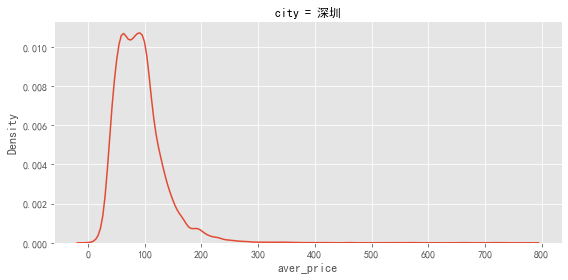

In [43]:
g = sns.FacetGrid(data, row="city", height=4, aspect=2)
g = g.map(sns.kdeplot, "aver_price")

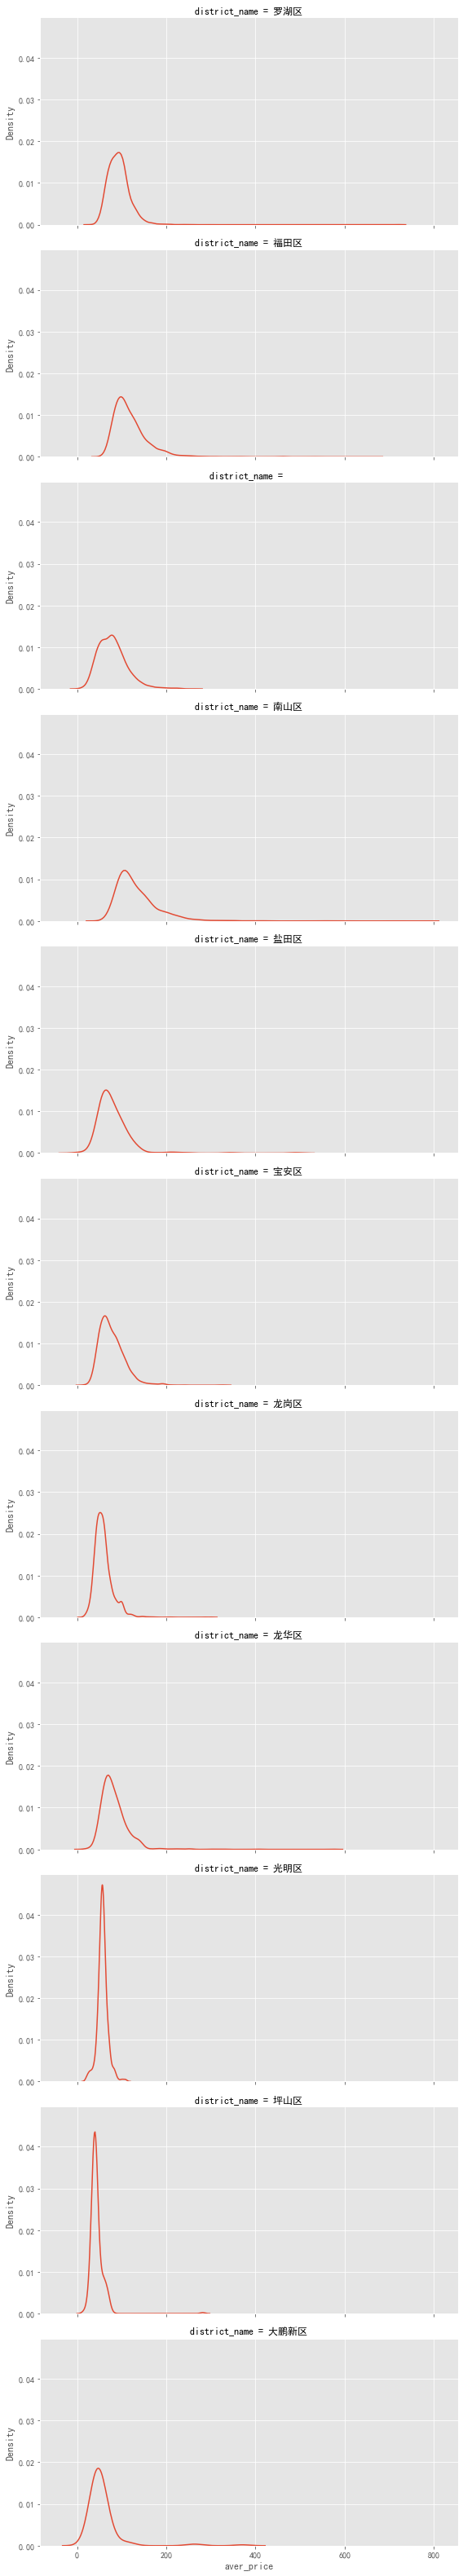

In [47]:
g = sns.FacetGrid(data, row="district_name", height=4, aspect=2)
g = g.map(sns.kdeplot, "aver_price")

In [48]:
# 由于平均租金基本上都集中在250元/平米/月以内，所以选取这部分数据绘制热力图
def get_city_zf_aver_price(city, city_short, col=['longitude', 'latitude', 'aver_price'], data=data):
    file_name = 'data_' + city_short + '_aver_price.csv'
    data_latlon = data.loc[(data['city']==city)&(data['aver_price']<=250), col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [49]:
get_city_zf_aver_price('深圳', 'sz')

深圳的数据一共有13610条


In [50]:
# 各城市租金Top10的商圈
bc_top10 = data.groupby(['city', 'bizcircle_name'])['aver_price'].mean().nlargest(50).reset_index()['city'].value_counts()

In [77]:
from pyecharts import Bar

bar = Bar("每平米平均租金前50的北上广深商圈数量", width=400)
bar.add("", bc_top10.index, bc_top10.values, is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, is_label_show=True)
bar

In [78]:
def get_top10_bc(city, data=data):
    top10_bc = data[(data['city']==city)&(data['bizcircle_name']!='')].groupby('bizcircle_name')['aver_price'].mean().nlargest(10)
    bar = Bar(city+"市每平米平均租金Top10的商圈", width=600)
    bar.add("", top10_bc.index, np.round(top10_bc.values, 0), is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, xaxis_rotate=30, is_label_show=True)
    return bar

In [79]:
get_top10_bc('深圳')

### 3. 距离地铁口远近有什么关系？

In [80]:
from scipy import stats

In [81]:
def distance_price_relation(city, data=data):
    g = sns.jointplot(x="distance", 
                  y="aver_price", 
                  data=data[(data['city']==city)&
                            (data['aver_price']<=350)].dropna(subset=['distance']), 
                  kind="reg",
                 stat_func=stats.pearsonr)
    g.fig.set_dpi(100)
    g.ax_joint.set_xlabel('最近地铁距离', fontweight='bold')
    g.ax_joint.set_ylabel('每平米租金', fontweight='bold')
    return g

TypeError: regplot() got an unexpected keyword argument 'stat_func'

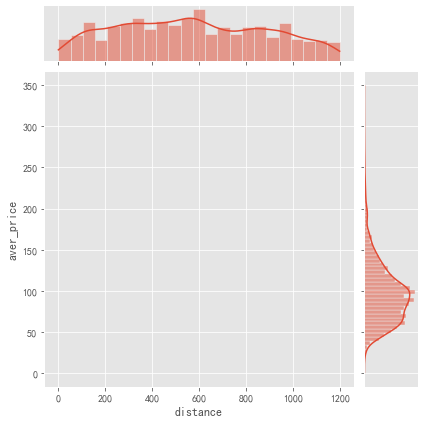

In [82]:
distance_price_relation('深圳')

In [60]:
bins = [100*i for i in range(13)]
data['bin'] = pd.cut(data.dropna(subset=['distance'])['distance'], bins)

In [61]:
bin_sz = data[data['city']=='深圳'].groupby('bin')['aver_price'].mean()

In [62]:
from pyecharts import Line


line = Line("距离地铁远近跟每平米租金均价的关系")
for city, bin_data in {'深圳':bin_sz}.items():
    line.add(city, bin_data.index, bin_data.values,
            legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
             xaxis_rotate=20, yaxis_min=8, legend_top=30)
line

### 4. 房屋大小对每平米租金的影响如何？

In [63]:
def area_price_relation(city, data=data):
    fig = plt.figure(dpi=100)
    g = sns.lineplot(x="rent_area",
                     y="aver_price",
                     data=data[(data['city']==city)&(data['rent_area']<150)],
                     ci=None)
    g.set_xlabel('面积', fontweight='bold')
    g.set_ylabel('每平米均价', fontweight='bold')
    return g

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

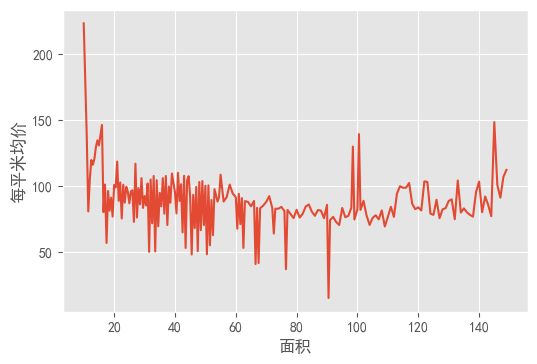

In [64]:
area_price_relation('深圳')

In [65]:
# 根据house_title和house_tag再造一个字段：is_dep，也就是“是否是公寓”
data['is_dep'] = (data['house_title'].str.contains('公寓')) > 0

In [66]:
# 每个城市房源的公寓占比
for city in ['深圳']:
    print(city+'的公寓占总房源量比重为:{}%。'.format(
        np.round(data[data['city']==city]['is_dep'].mean()*100, 2)))

深圳的公寓占总房源量比重为:9.56%。


In [67]:
data[(data['city']=='深圳')&
    (data['rent_area']>0)&
    (data['rent_area']<60)&
    (data['aver_price']>100)]['is_dep'].mean()

0.1461305663640294

### 5. 租个人房源好还是公寓好？

In [68]:
is_dep = data[(data['city'].isin(['深圳']))&
             (data['is_dep']==1)].groupby('city')['aver_price'].mean()
not_dep = data[(data['city'].isin([深圳']))&
             (data['is_dep']==0)].groupby('city')['aver_price'].mean()

In [69]:
bar = Bar("个人房源和公寓的每平米租金差别", width=600)
bar.add("个人房源", not_dep.index, np.round(not_dep.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("公寓", is_dep.index, np.round(is_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

### 5. 精装和简装对房子价格的影响

### 8. 各城市房屋租售比

### 9. 北上广深租房时都看重什么？

In [72]:
def layout_top3(city, data):
    layout_data = data[data['city']==city]['layout'].value_counts().nlargest(3)
    bar = Bar(city+"最受欢迎的户型", width=600)
    bar.add("", layout_data.index, layout_data.values, 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
    return bar

In [73]:
layout_top3('深圳', data)

In [74]:
from pyecharts import WordCloud